In [14]:
import fastf1 as ff1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colormaps
import numpy as np

In [4]:
session = ff1.get_session(2023, 13, 'Q')
session.load()

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '23', '14', '55', '11', '81', '16', '2', '18', '10', '44', '22', '27', '24', '31', '20', '77', '40']


In [6]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

In [9]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x,y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [15]:
cmap = colormaps.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

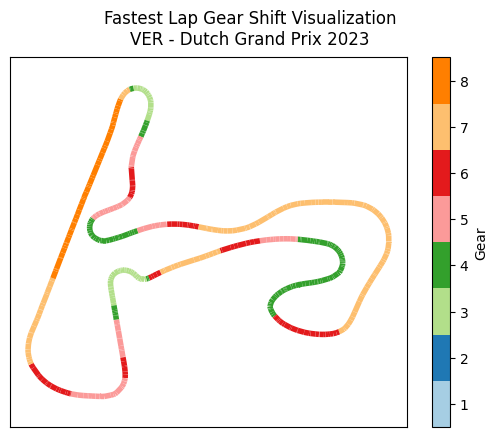

In [16]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1,10))
cbar.set_ticks(np.arange(1.5,9.5))
cbar.set_ticklabels(np.arange(1,9))

plt.show()